In [2]:
!pip install category_encoders

     --------------------------------------- 81.9/81.9 kB 37.6 kB/s eta 0:00:00


In [3]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
sns.set_style("darkgrid", 
              {"grid.color": ".6", 
               "grid.linestyle": ":"}) 
import category_encoders as ce 
from sklearn.decomposition import TruncatedSVD 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
tinder_df = pd.read_csv('tinder_data.csv')

In [6]:
tinder_df.head()

,user_id,username,age,status,sex,orientation,drinks,drugs,height,job,location,pets,smokes,language,new_languages,body_profile,education_level,dropped_out,bio,location_preference
0,fffe3100,Edith Lopez,27,single,f,gay,socially,never,66.0,medicine / health,"oakland, california",likes dogs and likes cats,no,"english (fluently), spanish (poorly), sign lan...",interested,athletic,4.0,no,bottom line i love life! i work hard and i lov...,same state
1,fffe3200,Travis Young,26,single,m,gay,socially,never,68.0,other,"pleasant hill, california",likes dogs,no,"english (fluently), tagalog (okay), french (po...",interested,fit,3.0,no,"i'm a straightforward, genuine, fun loving (i'...",anywhere
2,fffe3300,Agnes Smith,20,seeing someone,f,bisexual,socially,sometimes,69.0,other,"oakland, california",has dogs and likes cats,sometimes,"english (fluently), sign language (poorly), fr...",interested,fit,2.0,no,mmmmm yummy tacosss. yoga is where it's at. i ...,same city
3,fffe3400,Salvador Klaver,27,single,m,bisexual,socially,sometimes,68.0,computer / hardware / software,"daly city, california",likes dogs and likes cats,no,english,not interested,average,3.0,no,i'm a stealth geek. that special mix of techni...,same city
4,fffe3500,Elana Sewell,22,single,f,bisexual,often,sometimes,68.0,other,"oakland, california",likes dogs and likes cats,yes,english,not interested,average,2.0,yes,with the whisper of the wind i was weaved into...,same city


#### Exploratory Data Analysis of the Dataset

In [7]:
tinder_df.shape

(2001, 20)

In [9]:
tinder_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              2001 non-null   object 
 1   username             2001 non-null   object 
 2   age                  2001 non-null   int64  
 3   status               2001 non-null   object 
 4   sex                  2001 non-null   object 
 5   orientation          2001 non-null   object 
 6   drinks               2001 non-null   object 
 7   drugs                2001 non-null   object 
 8   height               2001 non-null   float64
 9   job                  2001 non-null   object 
 10  location             2001 non-null   object 
 11  pets                 2001 non-null   object 
 12  smokes               2001 non-null   object 
 13  language             2001 non-null   object 
 14  new_languages        2001 non-null   object 
 15  body_profile         2001 non-null   o

In [10]:
tinder_df.describe()

,age,height,education_level
count,2001.000000,2001.000000,2001.000000
mean,33.072464,68.289855,2.932534
std,10.483189,3.895246,0.812371
min,18.000000,55.000000,1.000000
25%,26.000000,65.000000,2.000000
50%,30.000000,68.000000,3.000000
75%,39.000000,71.000000,3.000000
max,69.000000,83.000000,5.000000


In [11]:
tinder_df.nunique()

user_id                2001
username               1995
age                      52
status                    4
sex                       2
orientation               3
drinks                    6
drugs                     3
height                   25
job                      21
location                 70
pets                     15
smokes                    5
language                575
new_languages             3
body_profile             12
education_level           5
dropped_out               2
bio                    2001
location_preference       3
dtype: int64

#### Data Wrangling
###### In data wrangling, we process and transform the data to get the most useful and better structure out of it

In [14]:
tinder_df.groupby(['sex', 'drugs'])['drugs'].count().reset_index(name='unique_drug_count') 

,sex,drugs,unique_drug_count
0,f,never,711
1,f,often,5
2,f,sometimes,146
3,m,never,875
4,m,often,13
5,m,sometimes,251


In [15]:
tinder_df.groupby(['new_languages', 'dropped_out'])['dropped_out'].count().reset_index(name='drop_out_people count')

,new_languages,dropped_out,drop_out_people count
0,interested,no,594
1,interested,yes,39
2,not interested,no,999
3,not interested,yes,51
4,somewhat interested,no,305
5,somewhat interested,yes,13


#### Data Visualization

<AxesSubplot:xlabel='age', ylabel='Count'>

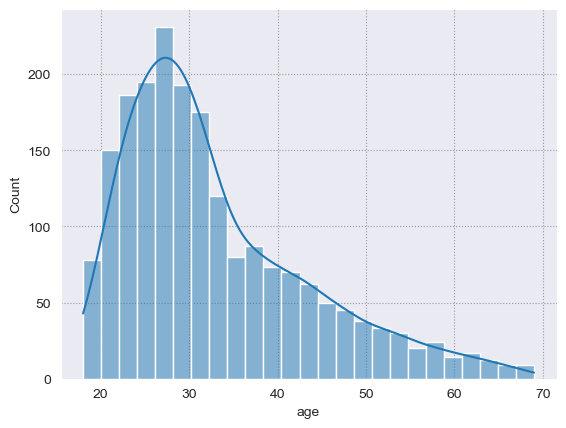

In [18]:
# distribution of age 
sns.histplot(tinder_df["age"], kde=True)

The age column has a long tail which shows it has a deviation from a normal distribution.

<AxesSubplot:xlabel='height', ylabel='Count'>

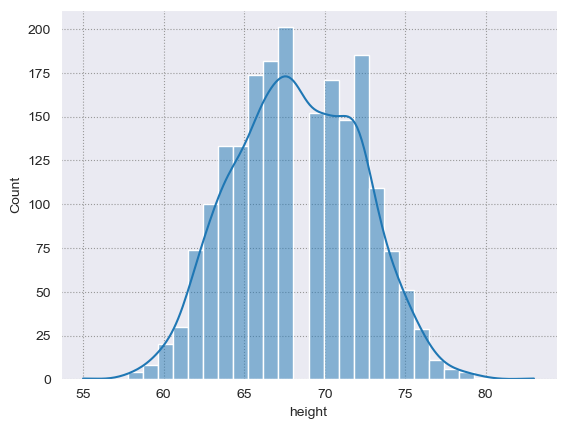

In [19]:
sns.histplot(tinder_df["height"], kde=True)

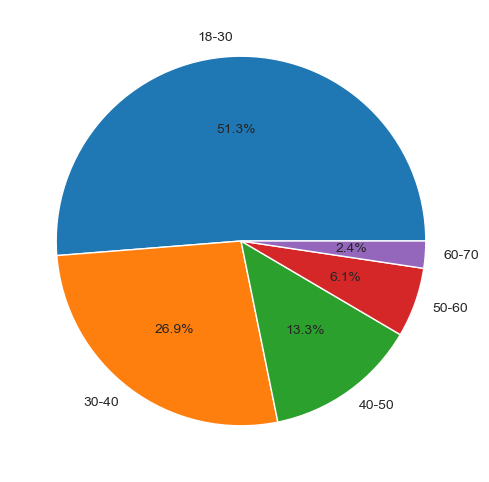

In [20]:
# Set the size of the figure to 10 inches 
# wide by 8 inches tall 
plt.figure(figsize=(6, 6)) 
  
# Divide the data into categories 
bins = [18, 30, 40, 50, 60, 70] 
  
# Use the `cut` function to assign 
# each data point to a category 
categories = pd.cut(tinder_df["age"], bins, 
                    labels=["18-30", "30-40", 
                            "40-50", "50-60", "60-70"]) 
  
# Count the number of data points in each category 
counts = categories.value_counts() 
  
# Plot the data as a pie chart 
plt.pie(counts, labels=counts.index, autopct='%1.1f%%') 
plt.show()

###### We can use the Histplot function from Seaborn to create a graph that shows the count of people in a particular job.

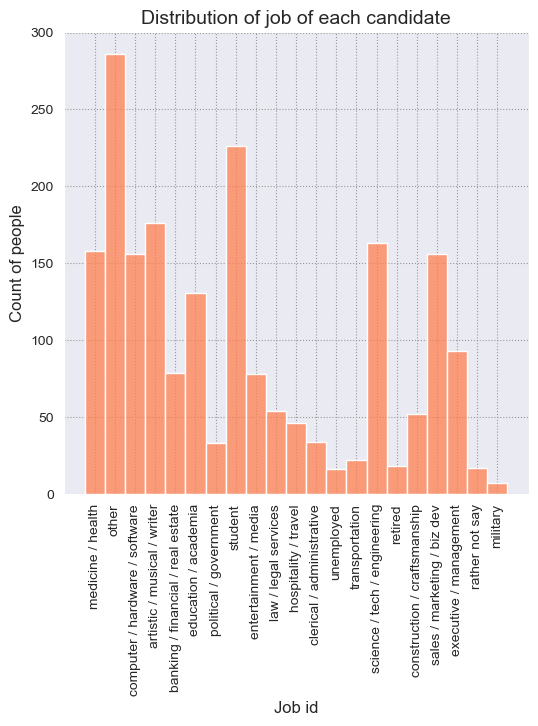

In [23]:
plt.figure(figsize=(6, 6)) 
sns.histplot(x="job", data=tinder_df, color="coral") 

# rotate x-axis labels vertically 
plt.xticks(rotation=90) 
plt.title("Distribution of job of each candidate", fontsize=14) 

plt.xlabel("Job id", fontsize=12) 
plt.ylabel("Count of people", fontsize=12) 

plt.show() 


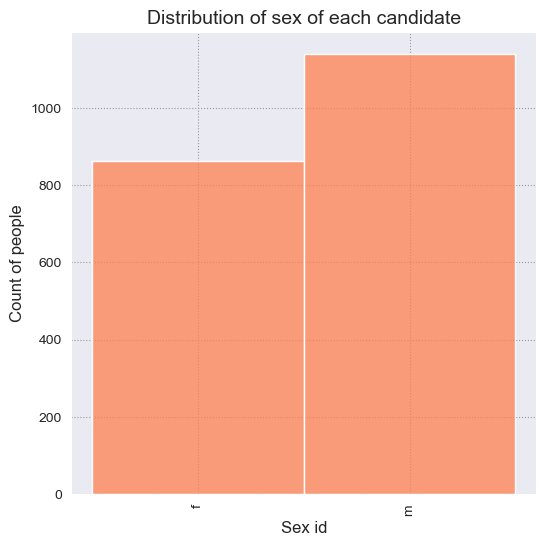

In [25]:
plt.figure(figsize=(6, 6)) 
sns.histplot(x="sex", data=tinder_df, color="coral") 

# rotate x-axis labels vertically 
plt.xticks(rotation=90) 
plt.title("Distribution of sex of each candidate", fontsize=14) 

plt.xlabel("Sex id", fontsize=12) 
plt.ylabel("Count of people", fontsize=12) 

plt.show() 

#### Data Manipulation 

In [26]:
# check if every row has a 
# common language as english 
tinder_df['language'].str.contains('english').unique()

array([ True])

Since there are 571 unique rows in the language column and every row has English as the column language. It will create a very sparse matrix if we do one-hot encoding of the language column so we will create another column that counts the number of unique languages that a person knows and eventually, we drop the language column.

In [27]:
# count the number of languages in each row 
tinder_df['num_languages'] = tinder_df['language'].str.count(',') + 1
tinder_df.drop(["language"], axis=1, inplace=True) 

In [30]:
tinder_df['num_languages'].unique()

array([3, 4, 1, 2, 5], dtype=int64)

In [31]:
# To encode location preference we will assign a number to each location’s preferred place like anywhere 
# giving the lowest preference to 1 and the same city having the highest preference to equal 2.5.
place_type_strength = { 
    'anywhere': 1.0, 
    'same state': 2.0, 
    'same city': 2.5
} 
  
tinder_df['location_preference'] = tinder_df['location_preference'].apply(lambda x: place_type_strength[x]) 

In [32]:
tinder_df['location_preference']

0       2.0
1       1.0
2       2.5
3       2.5
4       2.5
       ... 
1996    2.5
1997    2.0
1998    1.0
1999    2.5
2000    1.0
Name: location_preference, Length: 2001, dtype: float64

In [33]:
#We can easily handle columns that have only two unique categorical values by label encoding.
two_unique_values_column = { 
    'sex': {'f': 1, 'm': 0}, 
    'dropped_out': {'no': 0, 'yes': 1} 
} 
  
tinder_df.replace(two_unique_values_column, inplace=True)

In [34]:
# We will divide all four distinct elements into two parts.
#     Either he is single or available.
#     Either he is married or seeing someone higher weight is given to the people who are single or available.
status_type_strength = { 
    'single': 2.0, 
    'available': 2.0, 
    'seeing someone': 1.0, 
    'married': 1.0
} 
tinder_df['status'] = tinder_df['status'].apply(lambda x: status_type_strength[x]) 

In [36]:
from sklearn.preprocessing import LabelEncoder
# create a LabelEncoder object 
orientation_encoder = LabelEncoder() 
  
# fit the encoder on the orientation column 
orientation_encoder.fit(tinder_df['orientation']) 
  
# encode the orientation column using the fitted encoder 
tinder_df['orientation'] = orientation_encoder.transform(tinder_df['orientation']) 
  
# Drop the existing orientation column 
tinder_df.drop("orientation", axis=1, inplace=True)

In [37]:
drinking_habit = { 
    'socially': 'sometimes', 
    'rarely': 'sometimes', 
    'not at all': 'do not drink', 
    'often': 'drinks often', 
    'very often': 'drinks often', 
    'desperately': 'drinks often'
} 
tinder_df['drinks'] = tinder_df['drinks'].apply(lambda x: drinking_habit[x]) 
# create a LabelEncoder object 
habit_encoder = LabelEncoder() 
  
# fit the encoder on the drinks and drugs columns 
habit_encoder.fit(tinder_df[['drinks', 'drugs']] .values.reshape(-1)) 
  
# encode the drinks and drugs columns 
# using the fitted encoder 
tinder_df['drinks_encoded'] = habit_encoder.transform(tinder_df['drinks']) 
tinder_df['drugs_encoded'] = habit_encoder.transform(tinder_df['drugs']) 
  
# Drop the existing drink and drugs column 
tinder_df.drop(["drinks", "drugs"], axis=1, inplace=True) 

In [38]:
tinder_df.head()

,user_id,username,age,status,sex,height,job,location,pets,smokes,new_languages,body_profile,education_level,dropped_out,bio,location_preference,num_languages,drinks_encoded,drugs_encoded
0,fffe3100,Edith Lopez,27,2.0,1,66.0,medicine / health,"oakland, california",likes dogs and likes cats,no,interested,athletic,4.0,0,bottom line i love life! i work hard and i lov...,2.0,3,4,2
1,fffe3200,Travis Young,26,2.0,0,68.0,other,"pleasant hill, california",likes dogs,no,interested,fit,3.0,0,"i'm a straightforward, genuine, fun loving (i'...",1.0,3,4,2
2,fffe3300,Agnes Smith,20,1.0,1,69.0,other,"oakland, california",has dogs and likes cats,sometimes,interested,fit,2.0,0,mmmmm yummy tacosss. yoga is where it's at. i ...,2.5,4,4,4
3,fffe3400,Salvador Klaver,27,2.0,0,68.0,computer / hardware / software,"daly city, california",likes dogs and likes cats,no,not interested,average,3.0,0,i'm a stealth geek. that special mix of techni...,2.5,1,4,4
4,fffe3500,Elana Sewell,22,2.0,1,68.0,other,"oakland, california",likes dogs and likes cats,yes,not interested,average,2.0,1,with the whisper of the wind i was weaved into...,2.5,1,1,4


In [40]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
region_dict = {'southern_california': ['los angeles', 
                         'san diego', 'hacienda heights', 
                         'north hollywood', 'phoenix'], 
               'new_york': ['brooklyn', 
                            'new york']} 
  
def get_region(city): 
    for region, cities in region_dict.items(): 
        if city.lower() in [c.lower() for c in cities]: 
            return region 
    return "northern_california"
  
  
tinder_df['location'] = tinder_df['location'].str.split(', ').str[0].apply(get_region) 
# perform one hot encoding 
location_encoder = OneHotEncoder() 
  
# fit and transform the location column 
location_encoded = location_encoder.fit_transform(tinder_df[['location']]) 
  
# create a new DataFrame with the encoded columns 
location_encoded_df = pd.DataFrame(location_encoded.toarray(), columns=location_encoder.get_feature_names_out(['location'])) 
  
# concatenate the new DataFrame with the original DataFrame 
tinder_df = pd.concat([tinder_df, location_encoded_df], axis=1) 
# Drop the existing location column 
tinder_df.drop(["location"], axis=1, inplace=True) 

In [42]:
# create a LabelEncoder object 
job_encoder = LabelEncoder() 
  
# fit the encoder on the job column 
job_encoder.fit(tinder_df['job']) 
  
# encode the job column using the fitted encoder 
tinder_df['job_encoded'] = job_encoder.transform(tinder_df['job']) 
  
# drop the original job column 
tinder_df.drop('job', axis=1, inplace=True) 

In [43]:
smokes = { 
   'no': 1.0, 
   'sometimes': 0,  
   'yes': 0, 
   'when drinking':0, 
   'trying to quit':0
} 
tinder_df['smokes'] = tinder_df['smokes'].apply(lambda x: smokes[x])

In [44]:
# For the pets column, we will do Binary encoding.
bin_enc = ce.BinaryEncoder(cols=['pets']) 
  
# fit and transform the pet column 
pet_enc = bin_enc.fit_transform(tinder_df['pets']) 
  
# add the encoded columns to the original dataframe 
tinder_df = pd.concat([tinder_df, pet_enc], axis=1) 
  
tinder_df.drop("pets",axis=1,inplace = True) 

In [45]:
# For the new_language and body_profile columns, we will simply do One-Hot encoding. 
# create a LabelEncoder object 
location_encoder = LabelEncoder() 

# fit the encoder on the job column 
location_encoder.fit(tinder_df['new_languages']) 

# encode the job column using the fitted encoder 
tinder_df['new_languages'] = location_encoder.transform(tinder_df['new_languages']) 

# create an instance of LabelEncoder 
le = LabelEncoder() 

# encode the body_profile column 
tinder_df["body_profile"] = le.fit_transform(tinder_df["body_profile"]) 


#### Data Modelling 

In data modeling, we will first use TfidfVectorizer from the sklearn package to convert bio-categorical object Dtype into the numerical column. Note that output from the tfidVectorizer is a sparse matrix so here we will use SVD (Singular Value Decomposition) to reduce the dimensionality of the matrix.
For the purpose of finding a similarity between the user and our current present profile, we will use cosine similarity between the user and stored profile.
This is a content-based filtering algorithm in which we are using the user’s profile information to recommend other profiles with similar characteristics. This algorithm recommends the profiles which have the highest cosine similarity score with the user.

In [46]:
# Initialize TfidfVectorizer object 
tfidf = TfidfVectorizer(stop_words='english') 
  
# Fit and transform the text data 
tfidf_matrix = tfidf.fit_transform(tinder_df['bio']) 
  
# Get the feature names from the TfidfVectorizer object 
feature_names = tfidf.vocabulary_ 
  
# Convert tfidf matrix to DataFrame 
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), 
                        columns=feature_names) 
  
# Add non-text features to the tfidf_df dataframe 
tinder_dfs = tinder_df.drop(["bio", "user_id", 
                             "username"], axis=1) 
tinder_dfs = pd.concat([tinder_dfs, 
                        tfidf_df], axis=1) 
# Apply SVD to the feature matrix 
svd = TruncatedSVD(n_components=100) 
svd_matrix = svd.fit_transform(tinder_dfs) 
  
# Calculate the cosine similarity 
# between all pairs of users 
cosine_sim = cosine_similarity(svd_matrix)

#### Model Prediction

In [47]:
def recommend(user_df, num_recommendations=5): 
  
    # Apply SVD to the feature 
    # matrix of the user_df dataframe 
    svd_matrixs = svd.transform(user_df) 
  
    # Calculate the cosine similarity 
    # between the user_df and training set users 
    cosine_sim_new = cosine_similarity(svd_matrixs, svd_matrix) 
  
    # Get the indices of the top 
    # num_recommendations similar users 
    sim_scores = list(enumerate(cosine_sim_new[0])) 
    sim_scores = sorted(sim_scores, 
                        key=lambda x: x[1], reverse=True) 
    sim_indices = [i[0] for i in
                   sim_scores[1:num_recommendations+1]] 
  
    # Return the user_ids of the recommended users 
    return tinder_df['username'].iloc[sim_indices] 

##### Next, we will take input from the user and convert it into a dataframe so that we can use this information to make new predictions.

In [50]:
user_df = {} 
  
# Get user input for numerical columns 
user_df['age'] = float(input("Enter age: ")) 
user_df['status'] = float(input("Enter status: ")) 
user_df['sex'] = float(input("Enter sex (0 for female, 1 for male): ")) 
user_df['height'] = float(input("Enter height in inches: ")) 
user_df['smokes'] = float(input("Enter smokes (0 for no, 1 for yes): ")) 
user_df['new_languages'] = float(input("Enter number of new languages learned: ")) 
user_df['body_profile'] = float(input("Enter body profile (0-1)")) 
user_df['education_level'] = float(input("Enter education level (1-5): ")) 
user_df['dropped_out'] = float( 
    input("Enter dropped out (0 for no, 1 for yes): ")) 
user_df['bio'] = [input("Enter bio: ")] 
user_df['location_preference'] = float( 
    input("Enter location preference (0-2): ")) 
user_df['num_languages'] = float(input("Enter number of languages known: ")) 
user_df['drinks_encoded'] = float(input("Enter drinks encoded (0-3): ")) 
user_df['drugs_encoded'] = float(input("Enter drugs encoded (0-2): ")) 
  
# Get user input for one-hot encoded categorical columns 
user_df['location_new_york'] = float( 
    input("Enter location_new_york (0 or 1): ")) 
user_df['location_northern_california'] = float( 
    input("Enter location_northern_california (0 or 1): ")) 
user_df['location_southern_california'] = float( 
    input("Enter location_southern_california (0 or 1): ")) 
user_df['job_encoded'] = float(input("Enter job encoded (0-9): ")) 
user_df['pets_0'] = float(input("Enter pets_0 (0 or 1): ")) 
user_df['pets_1'] = float(input("Enter pets_1 (0 or 1): ")) 
user_df['pets_2'] = float(input("Enter pets_2 (0 or 1): ")) 
user_df['pets_3'] = float(input("Enter pets_3 (0 or 1): ")) 
  
# Convert tfidf matrix to DataFrame 
tfidf_df = pd.DataFrame(tfidf.transform( 
    user_df['bio']).toarray(), columns=feature_names) 
  
# Convert the user input 
# dictionary to a Pandas DataFrame 
user_df = pd.DataFrame(user_df, index=[0]) 
user_df.drop("bio", axis=1, inplace=True) 
user_df = pd.concat([user_df, tfidf_df], axis=1) 

Enter age: 32
Enter status: 2
Enter sex (0 for female, 1 for male): 1
Enter height in inches: 32
Enter smokes (0 for no, 1 for yes): 0
Enter number of new languages learned: 3
Enter body profile (0-1)1
Enter education level (1-5): 5
Enter dropped out (0 for no, 1 for yes): 0
Enter bio: I am a foodie and traveller. But sometimes like to sit alone in a  corner and read a good fiction.
Enter location preference (0-2): 2
Enter number of languages known: 4
Enter drinks encoded (0-3): 2
Enter drugs encoded (0-2): 1
Enter location_new_york (0 or 1): 0
Enter location_northern_california (0 or 1): 1
Enter location_southern_california (0 or 1): 1
Enter job encoded (0-9): 8
Enter pets_0 (0 or 1): 1
Enter pets_1 (0 or 1): 0
Enter pets_2 (0 or 1): 0
Enter pets_3 (0 or 1): 0


In [55]:
print(user_df)

    age  status  sex  height  smokes  new_languages  body_profile  \
0  32.0     2.0  1.0    32.0     0.0            3.0           1.0   

   education_level  dropped_out  location_preference  ...  homophobes  tween  \
0              5.0          0.0                  2.0  ...         0.0    0.0   

   resonanting  avant  garde  unites  devoting  diversify  subsistence  \
0          0.0    0.0    0.0     0.0       0.0        0.0          0.0   

   welness  
0      0.0  

[1 rows x 14196 columns]
